# Amazon Lead Data Scientist Python Test

This notebook is designed to evaluate your expertise in data science, machine learning, and ML Ops. You will work on a synthetic dataset simulating customer sessions on Amazon's platform. In addition to the modeling tasks, you'll answer questions related to ML Ops to demonstrate your readiness to deploy and maintain machine learning models in production.

Please follow the instructions provided in each section. Good luck!

## Overview

You are provided with a synthetic dataset (`amazon_data.csv`) containing the following columns:

- **session_id:** Unique identifier for each session.
- **user_id:** Unique identifier for each user.
- **timestamp:** Timestamp of the session event.
- **device_type:** Device used by the customer (e.g., "Desktop", "Mobile", "Tablet").
- **action:** User action during the session (e.g., "browse", "click", "add_to_cart", "purchase").
- **price:** Price of the product (if applicable).
- **product_category:** Category of the product (e.g., "electronics", "books", "fashion", "home").
- **purchase:** Binary indicator (0 or 1) indicating whether a purchase occurred during the session.

Your goal is to build a predictive model to estimate the likelihood of a purchase. Follow standard data science tasks from data preprocessing to model tuning and evaluation. Additionally, answer questions related to ML Ops practices.

## Dataset Generation

Run the following cell to generate the synthetic dataset and save it as `amazon_data.csv`.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Number of sessions to simulate
num_sessions = 2000

# Generate unique session IDs
session_ids = np.arange(1, num_sessions + 1)

# Generate random user IDs (simulate repeated customers)
user_ids = np.random.randint(1, 800, size=num_sessions)

# Generate random timestamps within the year 2023
base_date = datetime(2023, 1, 1)
random_days = np.random.randint(0, 365, size=num_sessions)
random_seconds = np.random.randint(0, 86400, size=num_sessions)
timestamps = [base_date + timedelta(days=int(d), seconds=int(s)) for d, s in zip(random_days, random_seconds)]

# Define device types with weighted probabilities
device_types = np.random.choice(
    ['Desktop', 'Mobile', 'Tablet'],
    size=num_sessions,
    p=[0.5, 0.4, 0.1]
)

# Define possible user actions with weighted probabilities
actions = np.random.choice(
    ['browse', 'click', 'add_to_cart', 'purchase'],
    size=num_sessions,
    p=[0.4, 0.3, 0.2, 0.1]
)

# Generate random prices between $10 and $2000, rounded to 2 decimals
prices = np.round(np.random.uniform(10, 2000, size=num_sessions), 2)

# Define product categories
product_categories = np.random.choice(
    ['electronics', 'books', 'fashion', 'home'],
    size=num_sessions
)

# Generate purchase indicator:
# - If action is 'purchase', then purchase = 1.
# - Otherwise, assign purchase based on probabilities:
#   * 'add_to_cart': 40% chance
#   * 'click': 15% chance
#   * 'browse': 5% chance
purchase = []
for act in actions:
    if act == 'purchase':
        purchase.append(1)
    elif act == 'add_to_cart':
        purchase.append(1 if np.random.rand() < 0.4 else 0)
    elif act == 'click':
        purchase.append(1 if np.random.rand() < 0.15 else 0)
    else:  # 'browse'
        purchase.append(1 if np.random.rand() < 0.05 else 0)
purchase = np.array(purchase)

# Create the DataFrame
df = pd.DataFrame({
    'session_id': session_ids,
    'user_id': user_ids,
    'timestamp': timestamps,
    'device_type': device_types,
    'action': actions,
    'price': prices,
    'product_category': product_categories,
    'purchase': purchase
})

# Save the dataset to a CSV file
df.to_csv('./data/amazon_data.csv', index=False)
print("Dataset 'amazon_data.csv' generated successfully!")

Dataset 'amazon_data.csv' generated successfully!


## Task 1: Data Loading and Preprocessing

1. **Load the Data:**
   - Read the `amazon_data.csv` file into a pandas DataFrame.
   - Display the first few rows to understand the data structure.

2. **Data Cleaning:**
   - Check for and handle missing values and outliers.
   - Convert the `timestamp` column to a datetime object.
   - Create additional time-based features (e.g., hour of day, day of week).

In [2]:
import pandas as pd
from datetime import datetime

# Load the dataset
data = pd.read_csv('./data/amazon_data.csv')
print("First few rows of the dataset:")
print(data.head())

# Convert timestamp to datetime and create time-based features
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['hour'] = data['timestamp'].dt.hour
data['day_of_week'] = data['timestamp'].dt.dayofweek

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Display data types after conversion
print("\nData types:")
print(data.dtypes)

First few rows of the dataset:
   session_id  user_id            timestamp device_type  action    price  \
0           1      103  2023-07-23 01:13:46     Desktop   click  1843.70   
1           2      436  2023-09-21 07:40:06     Desktop  browse  1957.23   
2           3      271  2023-11-24 13:17:12     Desktop  browse    31.23   
3           4      107  2023-06-27 07:49:11      Mobile  browse  1249.26   
4           5       72  2023-12-14 22:01:43     Desktop   click   831.55   

  product_category  purchase  
0            books         0  
1      electronics         0  
2      electronics         0  
3             home         0  
4      electronics         0  

Missing values in each column:
session_id          0
user_id             0
timestamp           0
device_type         0
action              0
price               0
product_category    0
purchase            0
hour                0
day_of_week         0
dtype: int64

Data types:
session_id                   int64
user_id      

## Task 2: Exploratory Data Analysis (EDA)

1. **Summary Statistics:**
   - Compute descriptive statistics for numerical and categorical features.

2. **Visualization:**
   - Plot the distribution of key features (e.g., `price`, `purchase`).
   - Visualize relationships between features (e.g., device type vs. purchase, product category vs. price).

Summary statistics:
        session_id      user_id                      timestamp        price  \
count  2000.000000  2000.000000                           2000  2000.000000   
mean   1000.500000   394.384500  2023-07-01 15:22:30.712499968   990.114865   
min       1.000000     1.000000            2023-01-01 00:19:21    10.110000   
25%     500.750000   188.000000  2023-04-05 09:27:27.750000128   511.910000   
50%    1000.500000   392.000000            2023-06-25 07:10:13   991.610000   
75%    1500.250000   604.250000     2023-10-01 06:08:06.500000  1467.355000   
max    2000.000000   799.000000            2023-12-31 19:44:54  1999.020000   
std     577.494589   235.335712                            NaN   563.605496   

          purchase         hour  day_of_week  
count  2000.000000  2000.000000  2000.000000  
mean      0.235000    11.464000     3.046000  
min       0.000000     0.000000     0.000000  
25%       0.000000     5.000000     1.000000  
50%       0.000000    11.000000  

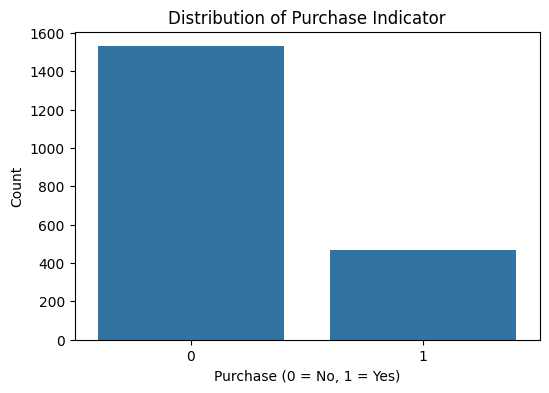

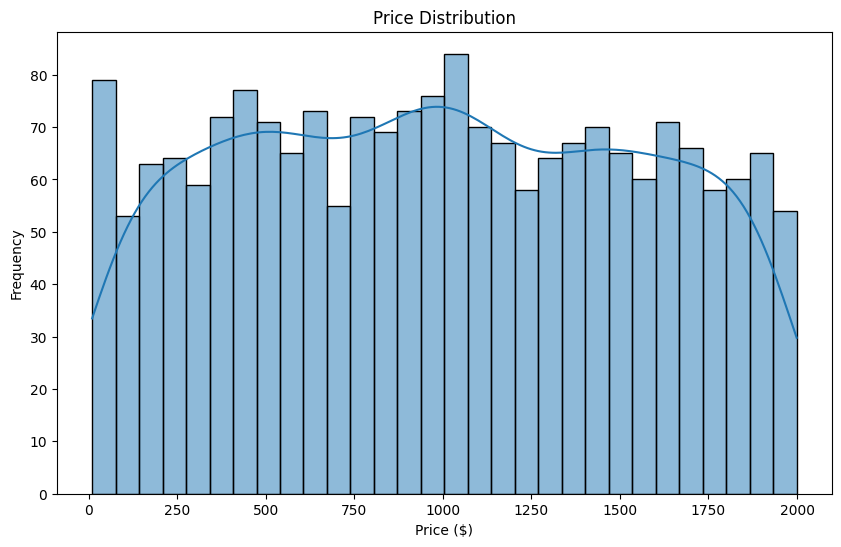

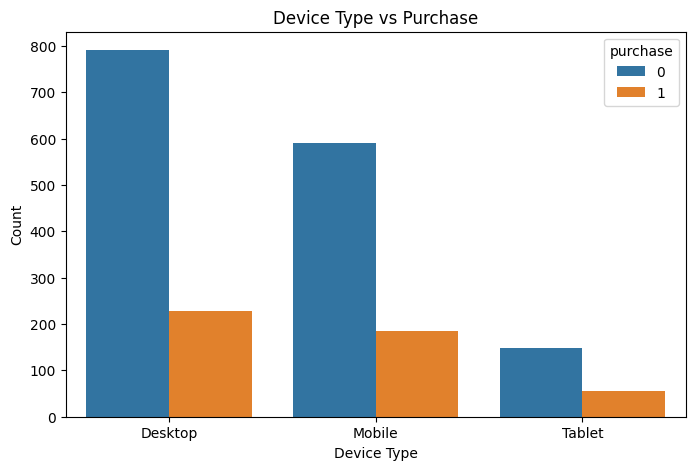

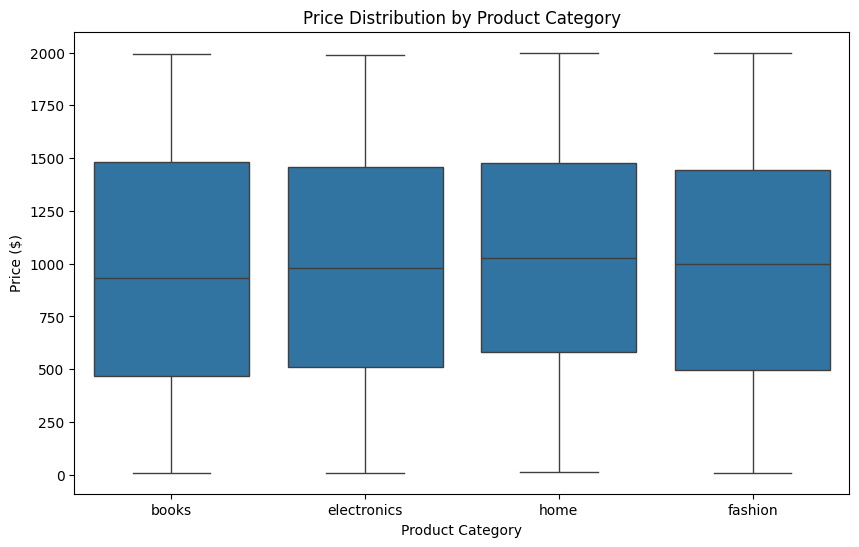

In [3]:
# Summary statistics
print("Summary statistics:")
print(data.describe())

# Plot distribution of purchase
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='purchase', data=data)
plt.title("Distribution of Purchase Indicator")
plt.xlabel("Purchase (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Plot price distribution
plt.figure(figsize=(10,6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

# Plot device type vs. purchase
plt.figure(figsize=(8,5))
sns.countplot(x='device_type', hue='purchase', data=data)
plt.title("Device Type vs Purchase")
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.show()

# Box plot for price by product category
plt.figure(figsize=(10,6))
sns.boxplot(x='product_category', y='price', data=data)
plt.title("Price Distribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Price ($)")
plt.show()

## Task 3: Feature Engineering

1. **Categorical Variables:**
   - Encode categorical variables (e.g., `device_type`, `action`, `product_category`) using one-hot encoding or a similar technique.

2. **Additional Features:**
   - Create new features if applicable (e.g., aggregated user behavior metrics or additional time-based features).

In [4]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['device_type', 'action', 'product_category'], drop_first=True)
print("Columns after one-hot encoding:")
print(data_encoded.columns)

Columns after one-hot encoding:
Index(['session_id', 'user_id', 'timestamp', 'price', 'purchase', 'hour',
       'day_of_week', 'device_type_Mobile', 'device_type_Tablet',
       'action_browse', 'action_click', 'action_purchase',
       'product_category_electronics', 'product_category_fashion',
       'product_category_home'],
      dtype='object')


## Task 4: Model Building

1. **Train-Test Split:**
   - Split the data into training and testing sets.

2. **Model Selection:**
   - Build at least one classification model (e.g., Logistic Regression, Random Forest, or XGBoost) to predict the likelihood of a purchase.
   - Train your model on the training set.

3. **Evaluation:**
   - Evaluate your model using metrics such as accuracy, ROC AUC, precision, recall, and F1 score.
   - Provide a confusion matrix and classification report.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Define features (X) and target (y). Drop non-informative columns.
X = data_encoded.drop(columns=['purchase', 'session_id', 'user_id', 'timestamp'])
y = data_encoded['purchase']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.845
ROC AUC Score: 0.8195912614517267

Confusion Matrix:
[[287  14]
 [ 48  51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       301
           1       0.78      0.52      0.62        99

    accuracy                           0.84       400
   macro avg       0.82      0.73      0.76       400
weighted avg       0.84      0.84      0.83       400



## Task 5: Model Tuning and Evaluation

1. **Hyperparameter Tuning:**
   - Use cross-validation and GridSearchCV (or a similar approach) to optimize your model’s hyperparameters.
   - Report the best hyperparameter settings and performance metrics.

2. **Feature Importance:**
   - Identify and visualize the most important features impacting your model’s predictions.

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validated ROC AUC: 0.8410533733335127

Best Model Accuracy: 0.8575
Best Model ROC AUC Score: 0.826336454243431


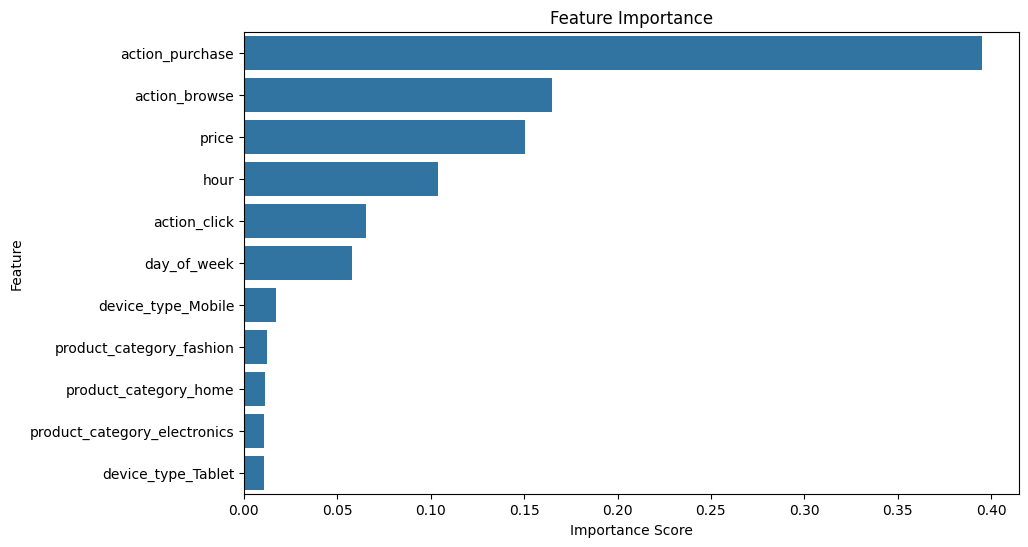

In [6]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Set up GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
                           param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated ROC AUC:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nBest Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model ROC AUC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))

# Plot feature importances
importances = best_model.feature_importances_
features = X.columns
import pandas as pd
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

## Task 6: ML Ops and Production Readiness

Answer the following questions in your submission. Provide written explanations and, where applicable, code or diagrams to illustrate your approach:

1. **Model Deployment:**
   - Describe how you would deploy your trained model in a production environment (e.g., using REST APIs, containerization, etc.).
   - Which platforms or tools would you use (e.g., AWS SageMaker, Docker, Kubernetes) and why?

2. **Monitoring and Logging:**
   - Explain how you would monitor the model's performance and detect data drift over time.
   - What logging and alerting mechanisms would you implement?

3. **CI/CD Pipeline for ML:**
   - Outline your strategy for setting up a continuous integration and deployment (CI/CD) pipeline for machine learning models.
   - Discuss any specific tools or practices (e.g., model versioning, automated testing, rollback mechanisms) you would adopt.

4. **Scalability and Maintenance:**
   - How would you ensure that your model scales to handle high volumes of incoming data and predictions?
   - Discuss strategies for model retraining and versioning in response to evolving data.

## Submission Instructions

- Provide your Python code in this notebook.
- Include your answers to the ML Ops questions either as markdown cells or in a separate document attached to your submission.
- Ensure that your code is well-commented and organized, and that visualizations and outputs are clearly labeled.
- Submit your notebook along with any supplementary documentation (e.g., diagrams for CI/CD pipelines) that supports your solutions.